# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

fcb4cadfec6e14e549f304a43686b2ce


### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | baturaja
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | cururupu
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | esso
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | sibolga
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | tres picos
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | itoman
Processing Rec

Processing Record 36 of Set 4 | naze
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | zhigansk
Processing Record 39 of Set 4 | umea
Processing Record 40 of Set 4 | sirjan
Processing Record 41 of Set 4 | stornoway
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | chulman
Processing Record 44 of Set 4 | half moon bay
Processing Record 45 of Set 4 | lugde
Processing Record 46 of Set 4 | zaysan
Processing Record 47 of Set 4 | ibipeba
Processing Record 48 of Set 4 | pacifica
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 0 of Set 5 | kampong cham
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | eureka
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | batagay
Processing Record 5 of Set 5 | puerto varas
Processing Record 6 of Set 5 | khrebtovaya
Processing Record 7 of Set 5 | muros
Processing Record 8 of Set 5 | bathsheba
Processing Record 9 of Set 5 | hutang
Proces

Processing Record 28 of Set 8 | saint-francois
Processing Record 29 of Set 8 | tsogni
Processing Record 30 of Set 8 | cabras
Processing Record 31 of Set 8 | togur
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | chivay
Processing Record 34 of Set 8 | marrakesh
Processing Record 35 of Set 8 | goure
Processing Record 36 of Set 8 | marcona
City not found. Skipping...
Processing Record 37 of Set 8 | jalingo
Processing Record 38 of Set 8 | cordoba
Processing Record 39 of Set 8 | san antonio
Processing Record 40 of Set 8 | deniliquin
Processing Record 41 of Set 8 | berlevag
Processing Record 42 of Set 8 | kloulklubed
Processing Record 43 of Set 8 | glomfjord
Processing Record 44 of Set 8 | henties bay
Processing Record 45 of Set 8 | atbasar
Processing Record 46 of Set 8 | airai
Processing Record 47 of Set 8 | kralovice
Processing Record 48 of Set 8 | tateyama
Processing Record 49 of Set 8 | ribeira grande
Processing Record 0 of Set 9 | tura
Processing Record 1 of Set

Processing Record 17 of Set 12 | kungurtug
Processing Record 18 of Set 12 | abha
Processing Record 19 of Set 12 | belmonte
Processing Record 20 of Set 12 | shelabolikha
Processing Record 21 of Set 12 | kropotkin
Processing Record 22 of Set 12 | santa maria
Processing Record 23 of Set 12 | svelgen
Processing Record 24 of Set 12 | carbonia
Processing Record 25 of Set 12 | amahai
Processing Record 26 of Set 12 | jinchang
Processing Record 27 of Set 12 | amalner
Processing Record 28 of Set 12 | south yuba city
Processing Record 29 of Set 12 | narsaq
Processing Record 30 of Set 12 | daru
Processing Record 31 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 12 | seoul
Processing Record 33 of Set 12 | uberaba
Processing Record 34 of Set 12 | atar
Processing Record 35 of Set 12 | ambilobe
Processing Record 36 of Set 12 | karangampel
Processing Record 37 of Set 12 | englehart
Processing Record 38 of Set 12 | calabozo
Processing Record 39 of Set 12 | galesong
Processin

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,23.04,39,100,4.82,NZ,1678583987
1,torbay,47.6666,-52.7314,1.27,95,100,10.29,CA,1678584021
2,baturaja,-4.1333,104.1667,23.93,95,98,0.28,ID,1678584021
3,ilulissat,69.2167,-51.1000,-7.99,49,13,2.06,GL,1678584022
4,new norfolk,-42.7826,147.0587,16.62,58,100,0.89,AU,1678584022


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,23.04,39,100,4.82,NZ,1678583987
1,torbay,47.6666,-52.7314,1.27,95,100,10.29,CA,1678584021
2,baturaja,-4.1333,104.1667,23.93,95,98,0.28,ID,1678584021
3,ilulissat,69.2167,-51.1000,-7.99,49,13,2.06,GL,1678584022
4,new norfolk,-42.7826,147.0587,16.62,58,100,0.89,AU,1678584022


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

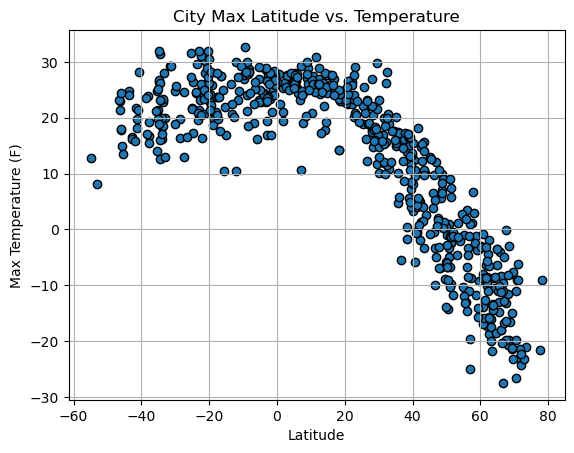

In [24]:
# Build scatter plot for latitude vs. temperature
fig,ax = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

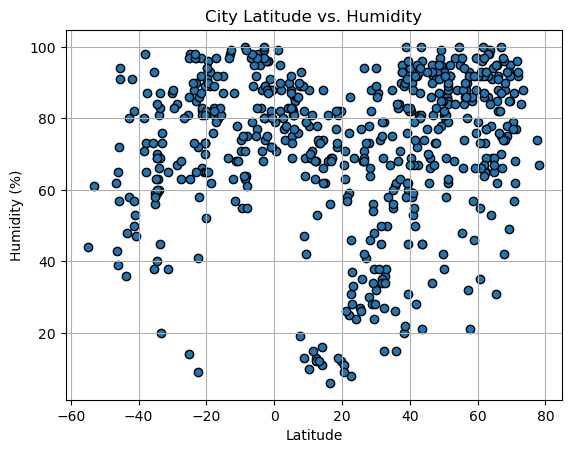

In [25]:
# Build scatter plot for latitude vs. humidity
fig,ax = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

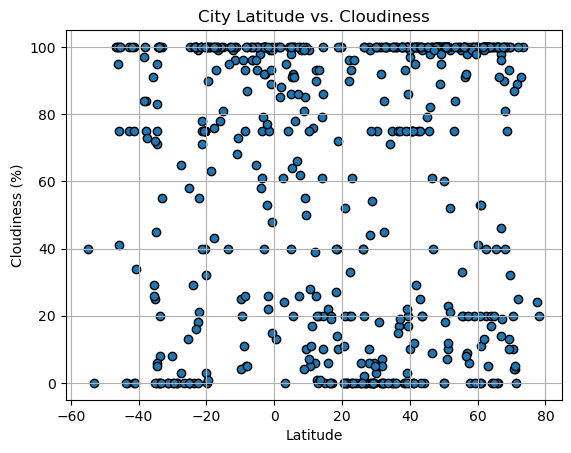

In [26]:
# Build scatter plot for latitude vs. cloudiness
fig,ax = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

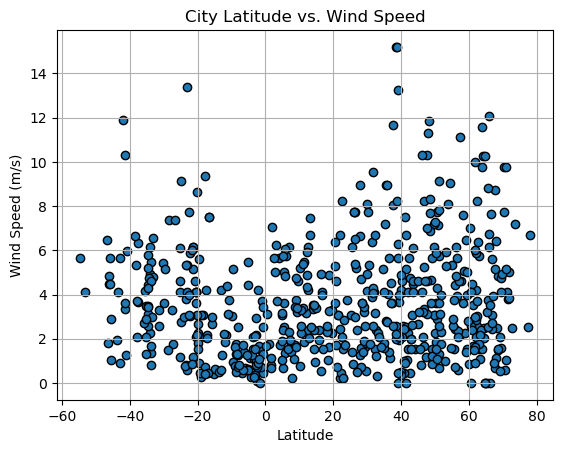

In [27]:
# Build scatter plot for latitude vs. wind speed
fig,ax = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
# latitude vs (Temperature, Humidity, Cloudiness, Wind Speed)
def regressionPlot(df, yaxis, xtext, ytext):
    x_values = df["Lat"]
    y_values = df[str(yaxis)]
    
    fig,ax = plt.subplots()    
    ax.scatter(x_values, y_values)

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(str(yaxis))
    
    
    corr = st.pearsonr(x_values, y_values)
    corr = corr.statistic
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    rvalue = abs(corr)
    print(f'The r-value is: {rvalue}')
    
    plt.text(xtext, ytext, s=line_eq, c="red", transform=plt.gca().transAxes, fontsize="xx-large")
    plt.plot(x_values, regress_values, "r-")

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,torbay,47.6666,-52.7314,1.27,95,100,10.29,CA,1678584021
3,ilulissat,69.2167,-51.1000,-7.99,49,13,2.06,GL,1678584022
7,barrow,71.2906,-156.7887,-22.99,77,0,4.12,US,1678583913
8,jamestown,42.0970,-79.2353,-1.92,92,100,1.54,US,1678583989
10,butaritari,3.0707,172.7902,27.65,74,0,6.22,KI,1678584024


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,23.04,39,100,4.82,NZ,1678583987
2,baturaja,-4.1333,104.1667,23.93,95,98,0.28,ID,1678584021
4,new norfolk,-42.7826,147.0587,16.62,58,100,0.89,AU,1678584022
5,cururupu,-1.8283,-44.8683,23.93,96,26,1.52,BR,1678584022
6,port elizabeth,-33.9180,25.5701,18.39,81,0,6.17,ZA,1678584023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.9160024216973011


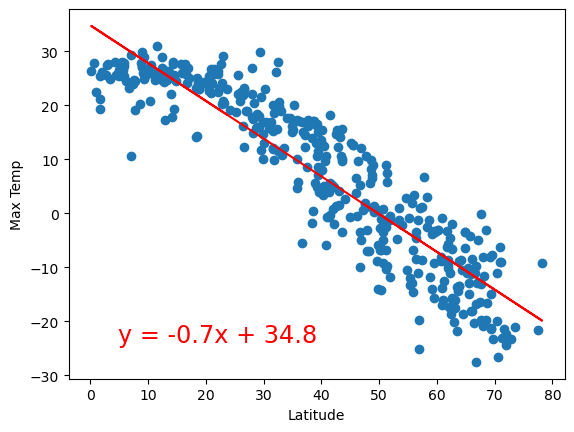

In [88]:
# Linear regression on Northern Hemisphere
regressionPlot(northern_hemi_df, "Max Temp", 0.1, 0.1)

The r-value is: 0.36091031317596356


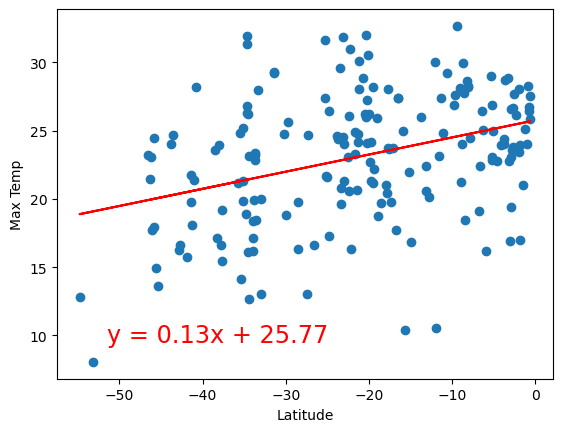

In [89]:
# Linear regression on Southern Hemisphere
regressionPlot(southern_hemi_df, "Max Temp", 0.1, 0.1)

**Discussion about the linear relationship:** The linear regression is modeling the linear relationship between Max Temp on the y-axis and latitude on the x-axis, for latitudes greater than or equal to zero (northern hemisphere) as well as latitudes less than zero (southern hemisphere). In this regression, we see that in the northern hemisphere that the linear relationship is rather strong with a calculated correlation coefficient of ~0.91, while the correlation in the southern hemisphere is much weaker at ~0.36. Looking at the northern hemisphere's plot, it appears the linear relationship is strongest at latitudes above 20.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2853486106998858


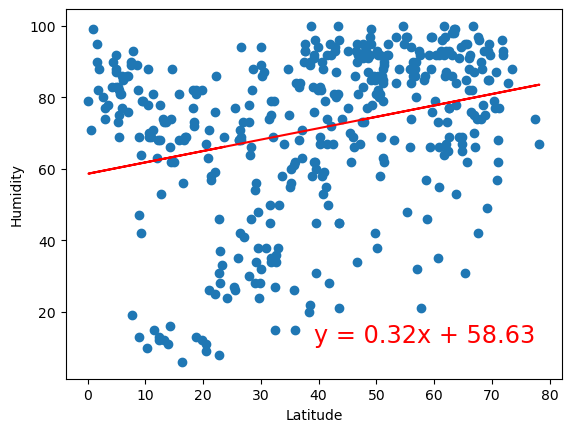

In [91]:
# Northern Hemisphere
regressionPlot(northern_hemi_df, "Humidity", 0.5, 0.1)

The r-value is: 0.4238756759684248


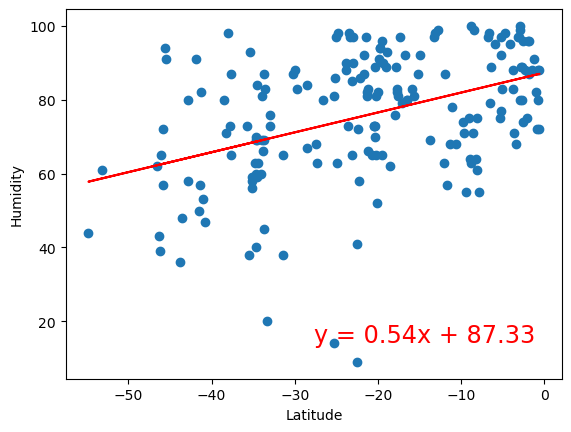

In [92]:
# Southern Hemisphere
regressionPlot(southern_hemi_df, "Humidity", 0.5, 0.1)

**Discussion about the linear relationship:** The linear regression is modeling the linear relationship between Humidity on the y-axis and latitude on the x-axis, for latitudes greater than or equal to zero (northern hemisphere) as well as latitudes less than zero (southern hemisphere). In this regression, we see that in the northern hemisphere that the linear relationship is weaker at ~0.28 and a little stronger at ~0.42 in the southern hemisphere. Though the southern hemisphere is stronger, both relationships are relatively weak. This is further verified by observation of the scatter plot itself.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1574440877695228


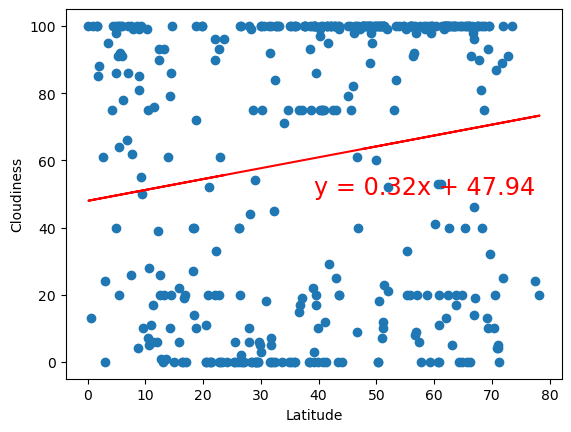

In [93]:
# Northern Hemisphere
regressionPlot(northern_hemi_df, "Cloudiness", 0.5, 0.5)

The r-value is: 0.24530737325128577


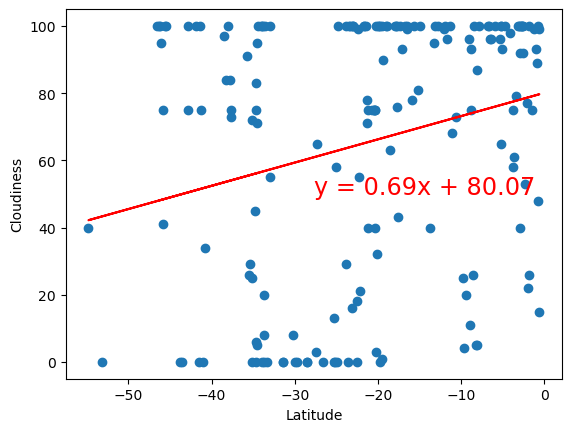

In [94]:
# Southern Hemisphere
regressionPlot(southern_hemi_df, "Cloudiness", 0.5, 0.5)

**Discussion about the linear relationship:** The linear regression is modeling the linear relationship between Cloudiness on the y-axis and latitude on the x-axis, for latitudes greater than or equal to zero (northern hemisphere) as well as latitudes less than zero (southern hemisphere). In this regression, we see that in the northern hemisphere that the linear relationship is very weak at ~0.15 and a little stronger at ~0.24 in the southern hemisphere. Though the southern hemisphere is stronger, both relationships are very weak. This is further verified by observation of the scatter plot itself.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12307071308227392


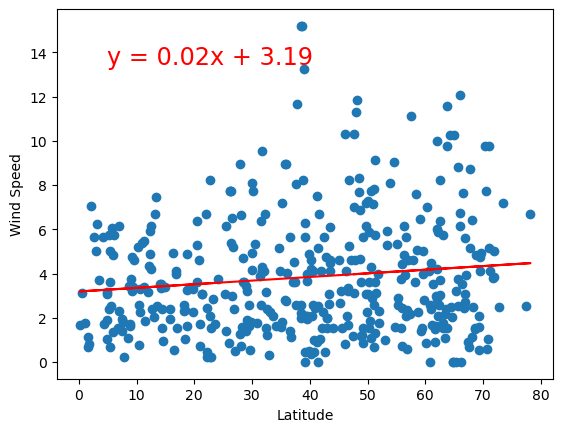

In [98]:
# Northern Hemisphere
regressionPlot(northern_hemi_df, "Wind Speed", 0.1, 0.85)

The r-value is: 0.4286354500488175


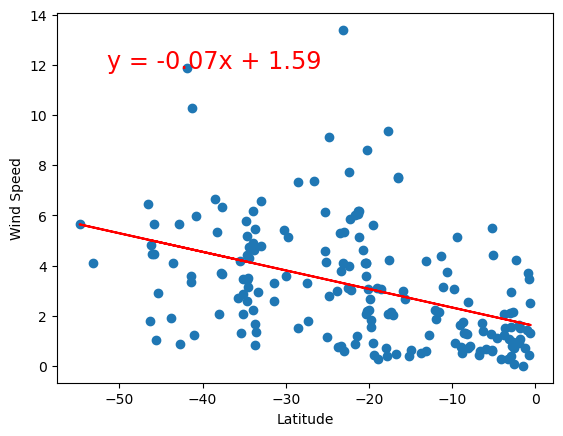

In [99]:
# Southern Hemisphere
regressionPlot(southern_hemi_df, "Wind Speed", 0.1, 0.85)

**Discussion about the linear relationship:** The linear regression is modeling the linear relationship between Wind Speed on the y-axis and latitude on the x-axis, for latitudes greater than or equal to zero (northern hemisphere) as well as latitudes less than zero (southern hemisphere). In this regression, we see that in the northern hemisphere that the linear relationship is very weak at ~0.12 and a much stronger at ~0.43 in the southern hemisphere. Though the southern hemisphere is stronger, both relationships are very weak. This is further verified by observation of the scatter plot itself.